In [37]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
cd ../

/media/HA-drive/phd/progs/PyDiagORB5


In [18]:
run main_jdote_template.py

In [32]:
# Now, you have access to project data
print('project name: ', dd['project_name'])
print('project path: ', dd['path'])
print('particle species in the system: ', dd['species_names'])
print('kinetic species: ', dd['kin_species_names'])

# print all currently available data
print('\n')
for key_dd in dd.keys():
    print(key_dd, ": ", dd[key_dd])
    
# note that the diagnostic might load other data later such as 2d fields etc.

project name:  LINEAR\ ES\, ADIABATIC\ ELECTRONS
project path:  ./TEMPLATES/f001-mpr/
particle species in the system:  ['deuterium', 'electrons', 'fast']
kinetic species:  ['deuterium', 'fast']


a0 :  0.482
R0 :  1.62
B0 :  2.2
mass_pf :  3.34524384738e-27
path :  ./TEMPLATES/f001-mpr/
project_name :  LINEAR\ ES\, ADIABATIC\ ELECTRONS
mpr_file_name :  orb5_res.h5
path_orb :  ./TEMPLATES/f001-mpr//orb5_res.h5
flag_equB_mult :  True
R0-axis :  1.62
max_size_Gb :  1.5
oper_system :  1
path_ext :  ./TEMPLATES/f001-mpr//saved_data.h5
n_starts :  1
n_starts_string :  1
species_names :  ['deuterium', 'electrons', 'fast']
kin_species_names :  ['deuterium', 'fast']
kin_species :  {'deuterium': <Species.Species object at 0x7fc57828e710>, 'fast': <Species.Species object at 0x7fc57828e940>}
pf :  <Species.Species object at 0x7fc57828e710>
deuterium :  <Species.Species object at 0x7fc57828e710>
electrons :  <Species.Species object at 0x7fc57828eac8>
fast :  <Species.Species object at 0x7fc57828e94

<IPython.core.display.Javascript object>


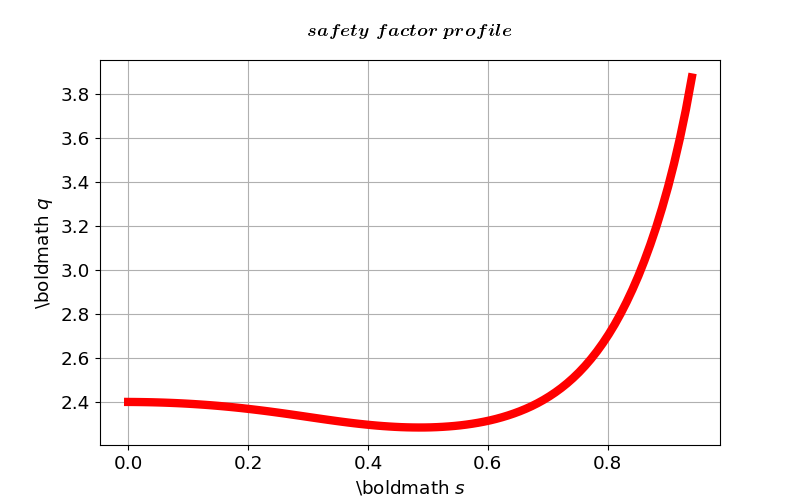

In [93]:
# **********************************
# *** PLOT SAFETY FACTOR PROFILE ***
# **********************************
reload()

ff = dict(GLO.DEF_PLOT_FORMAT)
ff['xlabel'] = 's'
ff['ylabel'] = 'q'
ff['title'] = 'safety\ factor\ profile'
ff['legends'] = ['q']
ff['colors'] = ['red']

chosen_signal = GLO.create_signal(GLO.def_safety_factor, dd)
oo_equ = {
    'signals': [chosen_signal],
    'ff': ff,
    'x_end': 0.95
}
common.plot_vars_1d(oo_equ)

<IPython.core.display.Javascript object>


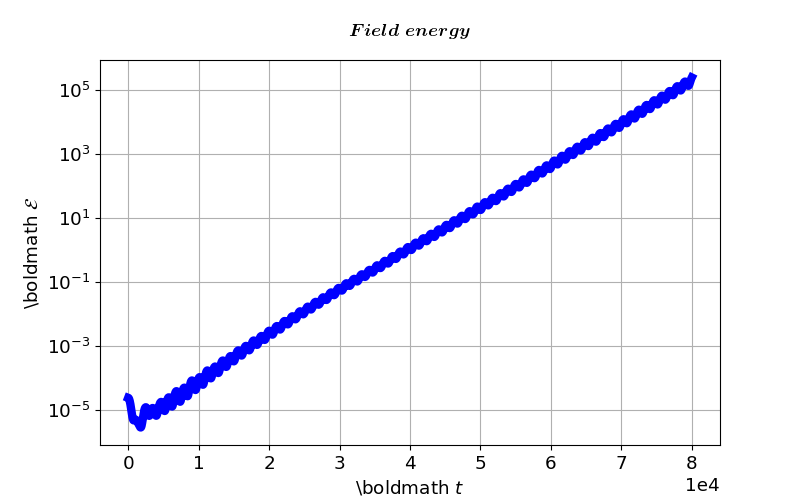

<IPython.core.display.Javascript object>


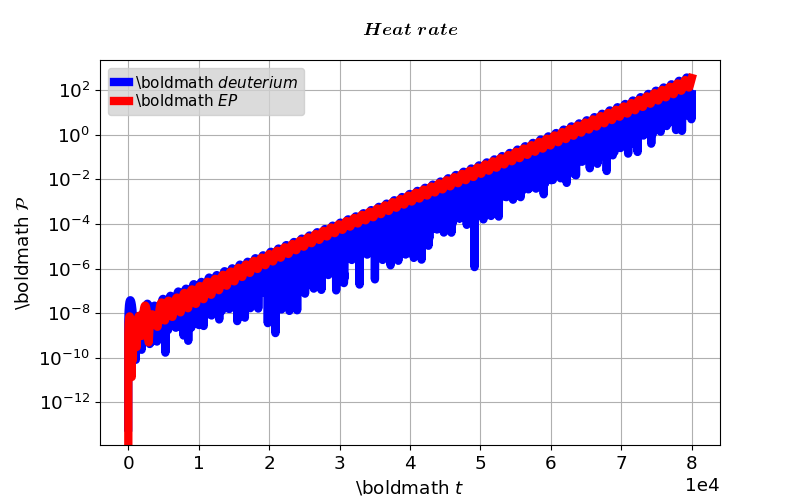

In [54]:
# ****************************************************
# *** TIME EVOLUTION OF FIELD ENERGY AND HEAT RATE ***
# ****************************************************
reload()

# --- Field energy ---
ff = dict(GLO.DEF_PLOT_FORMAT)
ff['xlabel'] = 't'
ff['ylabel'] = '\mathcal{E}'
ff['title'] = 'Field\ energy'
ff['legends'] = ['ES']
ff['flag_semilogy'] = True

ch_signals = GLO.create_signals_dds(GLO.def_efield, [dd])
oo = {
    'signals': ch_signals,
    'ff': ff,
}
common.plot_vars_1d(oo)

# --- Heat rate ---
ff.update({
    'ylabel': '\mathcal{P}',
    'title': 'Heat\ rate',
    'legends': ['deuterium', 'EP']
})

ch_signals = GLO.create_signals_dds(
    GLO.def_je, 
    [dd, dd], 
    species=['deuterium', 'fast'],
    planes=['tnone'] * 2,
    operations = ['none-'] * 2,
)
oo = {
    'signals': ch_signals,
    'ff': ff,
}
common.plot_vars_1d(oo)

<IPython.core.display.Javascript object>


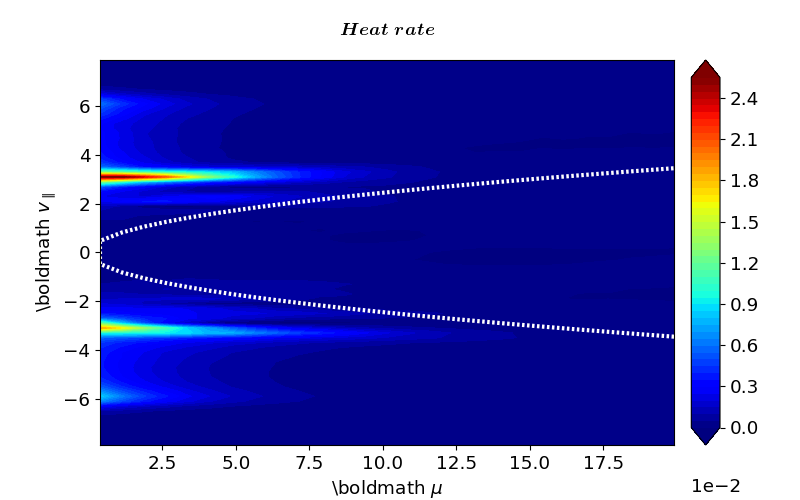

In [92]:
# ****************************************************
# *** HEAR RATE IN VELOCITY SPACE ***
# ****************************************************
reload()

species_chosen = 'deuterium'

# signal
ch_signal = GLO.create_signals_dds(
    GLO.def_je, 
    [dd], 
    variables=['jdote_es-mean-t'],
    species=[species_chosen],
    planes=['vparmu'],
    operations = ['none-'],
)[0]
ch_signal['t-domain'] = [5e4, 7e4]

# styling
ff = dict(GLO.DEF_PLOT_FORMAT)
ff['xlabel'] = '\mu'
ff['ylabel'] = 'v_{\parallel}'
ff['title'] = 'Heat\ rate'

# geometrical figures:
import MPR as mpr

mu_end = 20

mu_grid_orig = mpr.get_vel_grid(dd, species_chosen)['mu']
mu_grid, _ = mix.get_array_oo({'mu_end': mu_end}, mu_grid_orig, "mu")

pt_boundary = GEO.pass_trap_boundary(
    dd, 
    mu_grid
)['geom']

geoms = [pt_boundary]

# plotting
oo = {
    'signal': ch_signal,
    'ff': ff,
    'geoms': geoms,
    'mu_end': mu_end,
    'vpar_start': -8, 'vpar_end': 8
}
common.plot_vars_2d(oo)